<a href="https://www.kaggle.com/code/parisrohan/bank-customer-churn-using-ann?scriptVersionId=96944209" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id=0></a>
## [Introduction](#0)
Bank customer churn prediction using ANN

## Workflow

1. [Data collection and initial analysis](#1)
2. [EDA](#2)
3. [Data-preprocessing](#3)
4. [Model building](#4)
5. [Test data predictions](#5)

<a id=1></a> 
## 1. Data collection and initial analysis

In [1]:
#!pip install tensorflow-gpu

In [2]:
#Import required libraries

#Computing libraries
import pandas as pd
import numpy as np

#Visualizations library
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
%matplotlib inline

#Model building libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Deep learning libraries
import tensorflow as tf

#DL library to use forward and backward propogation
from tensorflow.keras.models import Sequential

#DL library to build input/hidden/output layers
from tensorflow.keras.layers import Dense

#DL library to prevent overfitting
from tensorflow.keras.layers import Dropout

#DL library to use activation function
from tensorflow.keras.layers import LeakyReLU, ReLU

#DL library to use optimizer
from tensorflow.keras.optimizers import Adam

#Performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/churn-for-bank-customers/churn.csv


In [3]:
#Check the installed tensorflow version
print(tf.__version__)

2.6.4


In [4]:
#dataset link='https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers'

#load the dataset
df_data = pd.read_csv('/kaggle/input/churn-for-bank-customers/churn.csv')
df_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Feature Description:

* RowNumber—corresponds to the record (row) number and has no effect on the output.
* CustomerId—contains random values and has no effect on customer leaving the bank.
* Surname—the surname of a customer has no impact on their decision to leave the bank.
* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography—a customer’s location can affect their decision to leave the bank.
* Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts—refers to the number of products that a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember—active customers are less likely to leave the bank.
* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited—whether or not the customer left the bank.

In [6]:
#Check for missing values
df_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<a id=2></a> 
## 2. EDA

<AxesSubplot:xlabel='Exited', ylabel='count'>

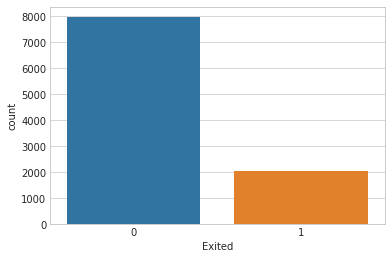

In [7]:
#Target feature distribution
sns.countplot(x='Exited', data=df_data)

<AxesSubplot:xlabel='Exited', ylabel='count'>

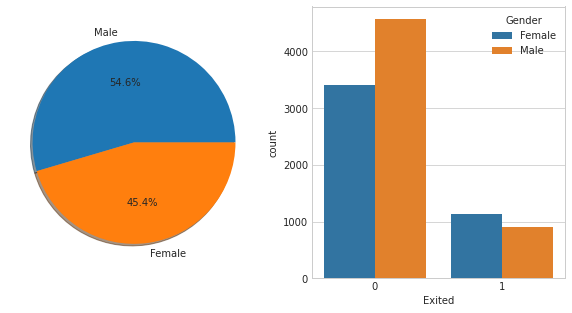

In [8]:
# Check the distribution of gender
plt.figure(figsize=(10,5))

#plot pie chart
plt.subplot(1,2,1)
label = df_data.Gender.value_counts().index
label_count = df_data.Gender.value_counts().values

plt.pie(data=df_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)

#Target feature distribution with Gender feature
plt.subplot(1,2,2)
sns.countplot(x='Exited', data=df_data ,hue='Gender')

<AxesSubplot:xlabel='Exited', ylabel='count'>

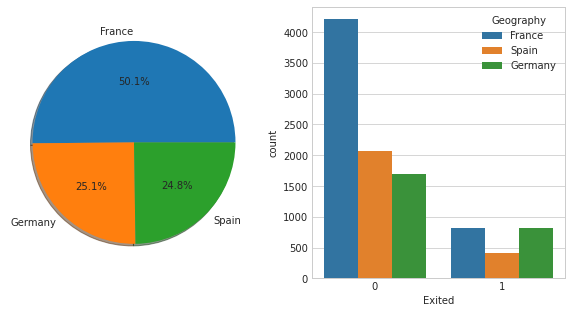

In [9]:
# Check the distribution of Geography
plt.figure(figsize=(10,5))

#plot pie chart
plt.subplot(1,2,1)
label = df_data.Geography.value_counts().index
label_count = df_data.Geography.value_counts().values

plt.pie(data=df_data, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)

#Target feature distribution with Gender feature
plt.subplot(1,2,2)
sns.countplot(x='Exited', data=df_data ,hue='Geography')

<a id=3></a> 
## 3. Data-preprocessing

In [10]:
df_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#drop features which are not required
df_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [12]:
#Onehot encode categorical features
geog = pd.get_dummies(df_data['Geography'], drop_first=True)
gen = pd.get_dummies(df_data['Gender'], drop_first=True)

In [13]:
geog.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [14]:
gen.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [15]:
#Concat the encoded features to the main dataframe
df_data = pd.concat([df_data,gen,geog],axis=1)

#Drop the old categorical features
df_data.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [16]:
df_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


<a id=4></a> 
## 4. Model building

In [17]:
#Seperate independent and dependent features
X = df_data.loc[:, df_data.columns!='Exited']
y = df_data['Exited']

X.shape, y.shape

((10000, 11), (10000,))

In [18]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_valid.shape, y_valid.shape)

Train (7000, 11) (7000,)
Test (3000, 11) (3000,)


In [19]:
# Feature Scaling
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_valid_sc = scaler.transform(X_valid)

In [20]:
#Initialise ANN
classifier = Sequential()

#Add input layer
classifier.add(Dense(units=11,activation='relu'))

#Add first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

#Add second hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

#Add output layer
classifier.add(Dense(units=1, activation='sigmoid'))

2022-05-29 20:06:57.039371: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [21]:
#optimizer
opt = Adam(learning_rate=0.01)

#compile
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
#Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

#monitor: Quantity to be monitored.

#min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.

#patience: Number of epochs with no improvement after which training will be stopped.

#verbose: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.

#mode: One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.

#baseline: Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.

#restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set.

In [23]:
#Fit model
model_history = classifier.fit(X_train_sc, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stop)

2022-05-29 20:06:57.307564: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
469/469 [==============================] - 3s 3ms/step - loss: 0.4536 - accuracy: 0.8055 - val_loss: 0.4073 - val_accuracy: 0.8178
Epoch 2/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.8153 - val_loss: 0.3871 - val_accuracy: 0.8204
Epoch 3/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.3948 - accuracy: 0.8189 - val_loss: 0.3999 - val_accuracy: 0.8174
Epoch 4/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.3855 - accuracy: 0.8266 - val_loss: 0.3758 - val_accuracy: 0.8412
Epoch 5/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.3784 - accuracy: 0.8377 - val_loss: 0.3768 - val_accuracy: 0.8416
Epoch 6/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.3682 - accuracy: 0.8441 - val_loss: 0.3797 - val_accuracy: 0.8382
Epoch 7/1000
469/469 [==============================] - 1s 3ms/step - loss: 0.3682 - accuracy: 0.8452 - val_loss: 0.3728 - val_accuracy:

In [24]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

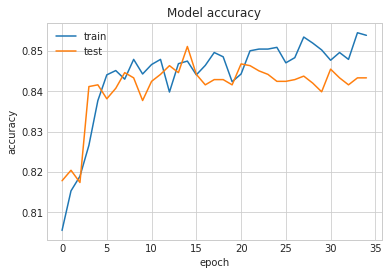

In [25]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

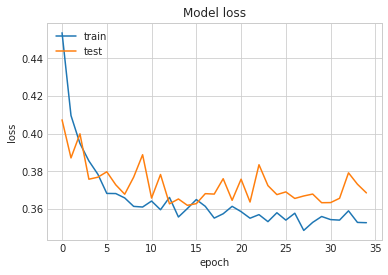

In [26]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

<a id=5></a> 
## 5. Test data Prediction

In [27]:
#make predictions
y_pred = classifier.predict(X_valid_sc)
y_pred = (y_pred >=0.5)

In [28]:
#confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
conf_matrix

array([[2329,   50],
       [ 383,  238]])

In [29]:
#accuracy score
print(accuracy_score(y_valid, y_pred))

0.8556666666666667
